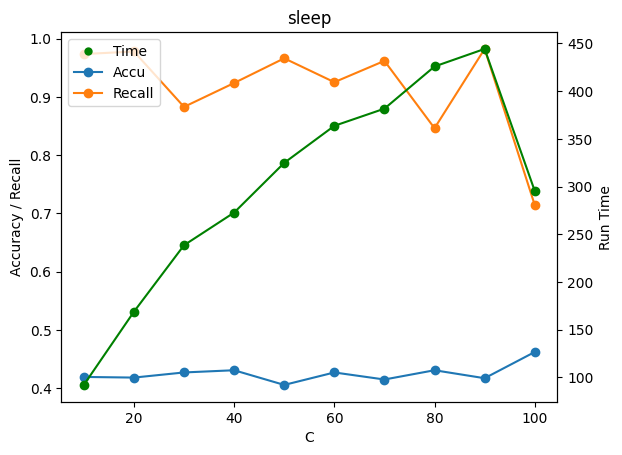

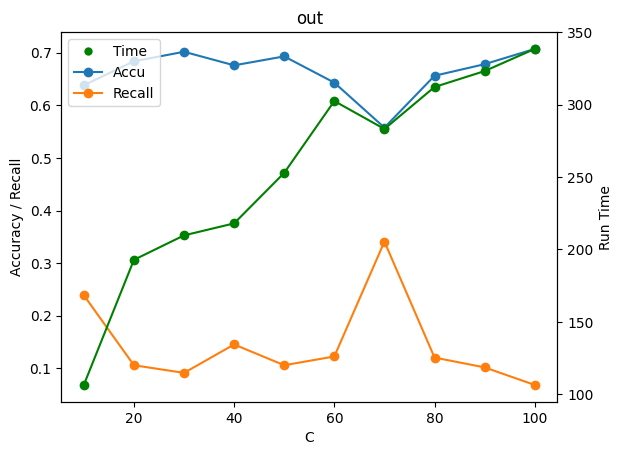

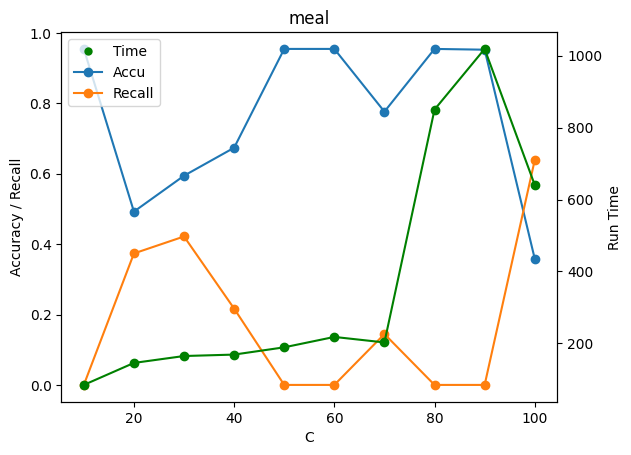

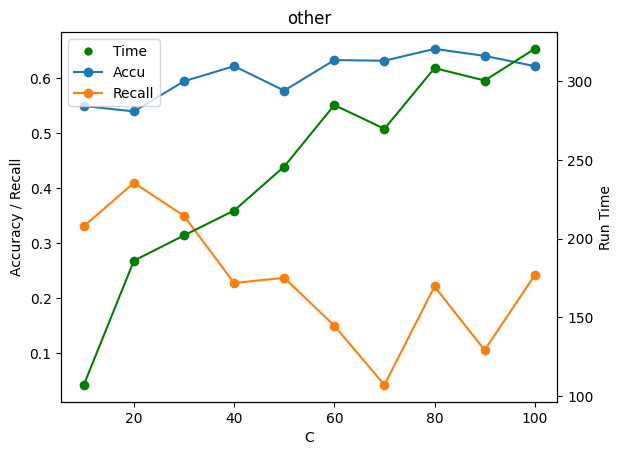

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取 CSV
df = pd.read_csv('TEPCO_result.csv')

# 選擇特定的 item
for item in ["sleep",'out','meal','other']:
    df_item = df[df['item'] == item]

    # 建立圖形和主軸
    fig, ax1 = plt.subplots()

    # 繪製 Accuracy 和 Recall 在主軸上
    ax1.plot(df_item['C'], df_item['accu'], marker='o', label='Accuracy')
    ax1.plot(df_item['C'], df_item['recall'], marker='o', label='Recall')
    ax1.set_xlabel('C')
    ax1.set_ylabel('Accuracy / Recall')
    ax1.legend(loc='upper left')

    # 建立與主軸共享 x 軸的副軸
    ax2 = ax1.twinx()

    # 在副軸上繪製 Run Time
    ax2.plot(df_item['C'], df_item['run_time'], marker='o', color='g', label='Run Time')
    ax2.set_ylabel('Run Time')

    # 創建一個假的 legend item 來在主軸的 legend 中添加 Run Time
    from matplotlib.lines import Line2D
    fake_line = Line2D([0], [0], linestyle='none', mfc='g', mec='none', marker='o')
    ax1.legend([fake_line] + ax1.lines, ['Time', 'Accu', 'Recall'], loc='upper left')

    # 添加標題
    plt.title(item)

    plt.show()


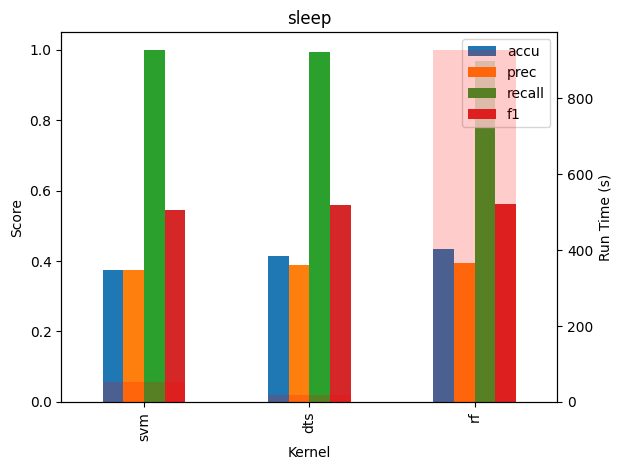

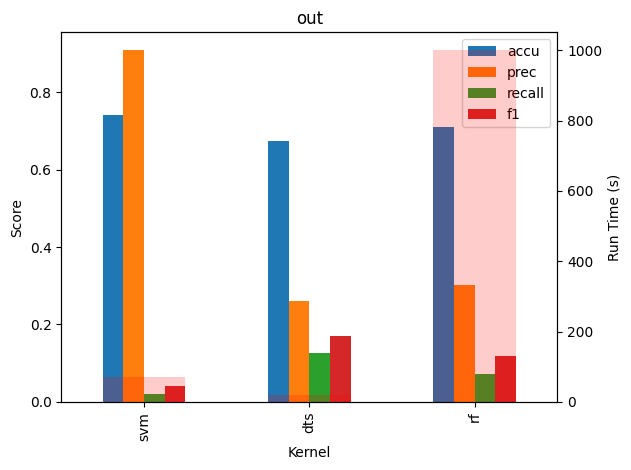

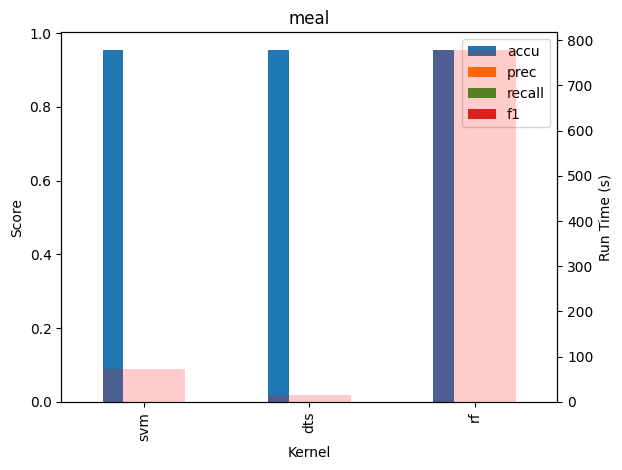

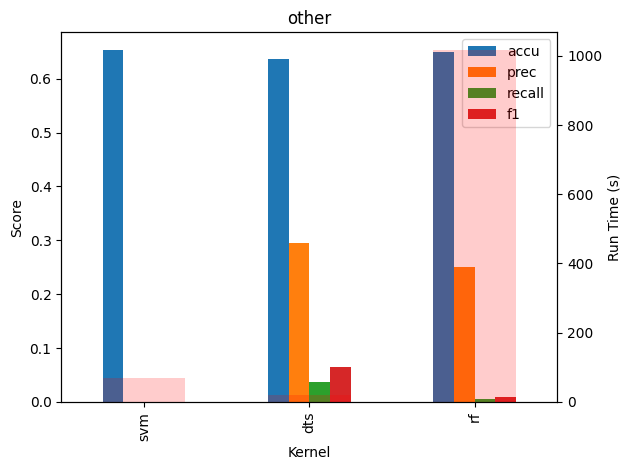

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取csv数据
df = pd.read_csv('feature_base.csv')

# 对四个行为分别绘制直方图
for behav in df['behav'].unique():
    data_behav = df[df['behav'] == behav].set_index('kernel')

    fig, ax1 = plt.subplots()

    # 左刻度绘制四个指标
    data_behav[['accu', 'prec', 'recall', 'f1']].plot(kind='bar', ax=ax1)
    ax1.set_ylabel('Score')
    ax1.set_xlabel('Kernel')

    # 右刻度绘制运行时间
    ax2 = ax1.twinx()
    data_behav['run_time'].plot(kind='bar', ax=ax2, color='r', alpha=0.2) # alpha设置为透明度以区分左侧刻度
    ax2.set_ylabel('Run Time (s)')

    plt.title(behav)
    plt.show()
